In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener
from scipy.fft import fft2, ifft2, fftshift
from skimage import io, img_as_ubyte, util, color
from skimage.metrics import peak_signal_noise_ratio

plt.style.use('dark_background')

In [178]:
def PSD(signal):
    auto_corr_signal = np.abs(ifft2(np.abs(fft2(signal))**2))
    return fftshift(auto_corr_signal)

def CPSD(signal1, signal2):
    auto_corr_signal = np.conj(fft2(signal1)) * fft2(signal2)
    return fftshift(auto_corr_signal)

def wiener_filter(noisy_image, original_image):
    original_psd = PSD(original_image)
    noisy_psd = PSD(noisy_image)
    cpsd = CPSD(original_image, noisy_image)
    H = cpsd / (cpsd + noisy_psd)
    Y = fft2(noisy_image) * H
    denoised_image = np.real(ifft2(Y))
    return denoised_image

In [181]:
original_image = io.imread('data/lena.png')
original_image = color.rgb2gray(original_image)
noisy_image = util.random_noise(original_image, mode='gaussian')
scipy_image = wiener(noisy_image)

noise = noisy_image - original_image
our_image = wiener_filter(original_image, noisy_image)

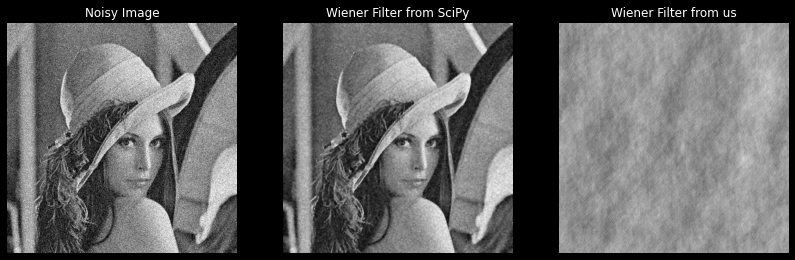

In [182]:
# Display the images
plt.figure(figsize=(14, 16))
plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Noisy Image')

plt.subplot(1, 3, 2)
plt.imshow(scipy_image, cmap='gray')
plt.axis('off')
plt.title('Wiener Filter from SciPy')

plt.subplot(1, 3, 3)
plt.imshow(our_image, cmap='gray')
plt.axis('off')
plt.title('Wiener Filter from us')

plt.show()

In [168]:
original_image = img_as_ubyte(original_image)
scipy_image = img_as_ubyte(scipy_image)
our_image = img_as_ubyte(our_image)

psnr_value_scipy = peak_signal_noise_ratio(original_image, scipy_image)
psnr_value_us = peak_signal_noise_ratio(original_image, our_image)
print("PSNR from SciPy:", psnr_value_scipy)
print("PSNR from us:", psnr_value_us)

PSNR from SciPy: 27.076793088483658
PSNR from us: 12.74698632808696
